# Homework 4
## Lena Bohman
## Part 1 UFO Scatterplot

In [23]:
%matplotlib inline

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

In [25]:
ufos = pd.read_csv("ufo-scrubbed-geocoded-time-standardized-00.csv", #from class and prep notebooks
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])
ufos = ufos.fillna({'country':'unknown', 'state': 'unknown', 'shape':'unknown'})

In [5]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


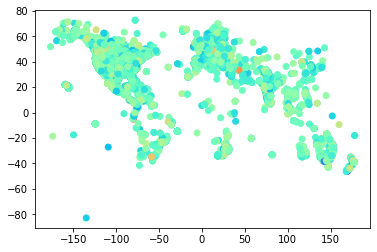

In [6]:
#model plot from class
plt.scatter(ufos['longitude'], ufos['latitude'], 
           c=np.log10(ufos['duration_seconds']), cmap='rainbow') # changed to a scatter plot, note no marker -- .
plt.show()

In [26]:
@ipywidgets.interact(x=["shape", "country", "date"], y=["shape", "country", "date"], cmap=plt.colormaps()) #plt.colormaps from prep notebook
def make_scatter(x, y, cmap):
    plt.scatter(ufos[x], ufos[y], 
           c=np.log10(ufos['duration_seconds']), cmap=cmap)
    plt.show()

interactive(children=(Dropdown(description='x', options=('shape', 'country', 'date'), value='shape'), Dropdown…

### Discussion
I didn't think there were actually a lot of comparisons that made sense in this plot. Since I was already using the duration in the colormap, I didn't want to repeat it on the x and y axes. I thought maybe comparing which countries and shapes were more likely over time would be a useful interpretation of this data. If we report UFO sightings based on our culture, we might expect the shapes to change based on place (if there are different cultural touchpoints about what UFOs should look like in Asia as opposed to the US, for instance), or over time (if an influential movie is released, maybe more people report UFOs that look like that reference).

## Part 2: UFO Bar Chart

In [44]:
@ipywidgets.interact(grouped=["country", "shape"], grouping=["duration_seconds", "latitude", "longitude"])
def make_hist(grouped, grouping):
    hist_data=ufos.groupby([grouped])[grouping].mean()
    hist_data.plot(kind="bar")
    plt.show()

interactive(children=(Dropdown(description='grouped', options=('country', 'shape'), value='country'), Dropdown…

### Discussion
I also had trouble coming up wtih meaningful bar charts for this part of the assignment (and the country/latitude or country/longitude pairing isn't especially meaningful). There isn't a lot of numerical data in this data set that is really useful, pretty much on the duration_seconds column is non geographic and not a date. All of my histograms are categorical, so I did not create the code for changing the number of bins, but this is because I could not figure out a continuous data set that would be meaningful to create.